In [1]:
%cd ..

/Users/danorel/Workspace/Education/Self-Education/Programming/AI/MuJoCo/rlab


In [2]:
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import mediapy as media
import numpy as np
import time

In [3]:
m = mujoco.MjModel.from_xml_path('tutorial/models/box.xml')
d = mujoco.MjData(m)

In [4]:
renderer = mujoco.Renderer(m, 300, 300)

In [5]:
fps = 30
duration = 5
n_frames = 60

frames = []

mujoco.mj_resetData(m, d)
ground = m.geom('ground')
ground.friction[:] = 0.5 # controls friction value for ground

for i in range(n_frames):
    while d.time * fps < i:
        mujoco.mj_step(m, d)
    renderer.update_scene(d, "y")
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=fps)

In [6]:
m = mujoco.MjModel.from_xml_path('tutorial/models/box_and_square_sensors.xml')
d = mujoco.MjData(m)

In [7]:
renderer = mujoco.Renderer(m, 320, 480)

""

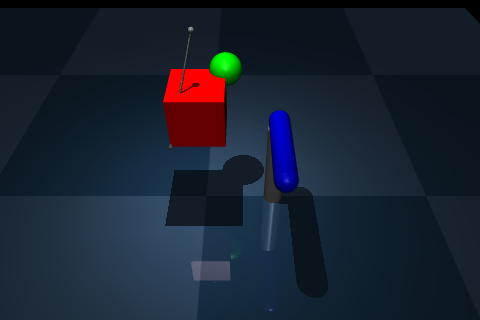

In [8]:
mujoco.mj_forward(m, d)
renderer.update_scene(d)
media.show_image(renderer.render())

In [9]:
fps = 30
n_frames = 200

timevals = []
accelerations = []

frames = []

mujoco.mj_resetData(m, d)
d.ctrl = 20

for i in range(n_frames):
    while d.time * fps < i:
        mujoco.mj_step(m, d)
        timevals.append(d.time)
        accelerations.append(d.sensor('accelerometer').data.copy())
    renderer.update_scene(d, "fixed")
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=fps)

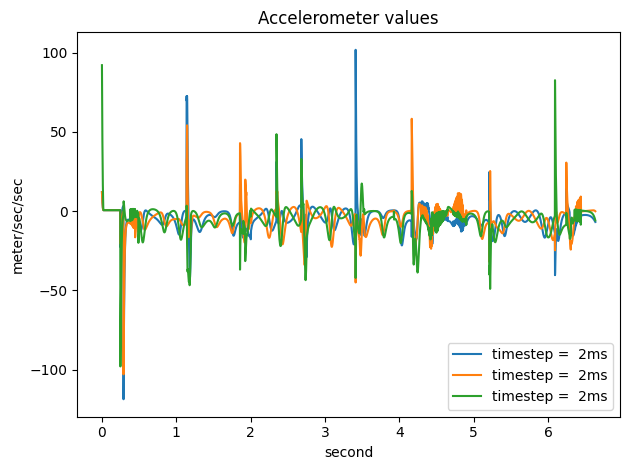

In [10]:
ax = plt.gca()
ax.plot(np.asarray(timevals), np.asarray(accelerations), label='timestep = {:2.2g}ms'.format(1000*m.opt.timestep))
ax.set_title('Accelerometer values')
ax.set_ylabel('meter/sec/sec')
ax.set_xlabel('second')
ax.legend(frameon=True, loc='lower right');
plt.tight_layout()